In [1]:
import numpy as np
import pickle
import os
import sklearn
from sklearn.linear_model import Ridge
from scipy.spatial.distance import pdist, squareform
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import diptest
from scipy.stats import pearsonr
from scipy.stats import gaussian_kde

#generated with ChatGPT
def calculate_derivative(data, dx=1):
    derivative = []
    n = len(data)
    for i in range(1, n - 1):
        derivative_value = (data[i+1] - data[i-1]) / (2*dx)
        derivative.append(derivative_value)
    return derivative

Load result object containing information closest neighborhoods for each word and year, a list of words ordered by the sum of their derivative or Hartigan's D and other data required for exploration & visualization.

In [3]:
with open("results_k_30.pkl", 'rb') as f:
    [closestNeighborsIdxs, top_words, data] = pickle.load(f)
    
top_words

['contempt',
 'heresy',
 'flew',
 'stones',
 'melt',
 'te',
 'bribery',
 'substituted',
 'respects',
 'imprisonment',
 'lessen',
 'statesman',
 'punishment',
 'honoured',
 'personal',
 'prevent',
 'imbecility',
 'sincerely',
 'robbery',
 'singular',
 'perished',
 'allegiance',
 'vie',
 'earthen',
 'fathom',
 'imprisoned',
 'robinson',
 'traitors',
 'heighten',
 'including',
 'dislike',
 'supply',
 'governing',
 'herald',
 'cowardice',
 'insurrection',
 'brush',
 'courage',
 'intentions',
 'weapon',
 'lettres',
 'flemish',
 'editors',
 'blow',
 'breezes',
 'infirmities',
 'milton',
 'danish',
 'cash',
 'misled',
 'perpetual',
 'shutting',
 'methods',
 'seditious',
 'bravest',
 'limb',
 'peculiarity',
 'miles',
 'weeping',
 'sensations',
 'sage',
 'impair',
 'invent',
 'hinder',
 'jealousies',
 'personages',
 'brigadier',
 'ruin',
 'spenser',
 'seemeth',
 'exactness',
 'families',
 'bags',
 'owner',
 'weekly',
 'rain',
 'native',
 'sufficiently',
 'hunting',
 'foul',
 'morn',
 'imperfect

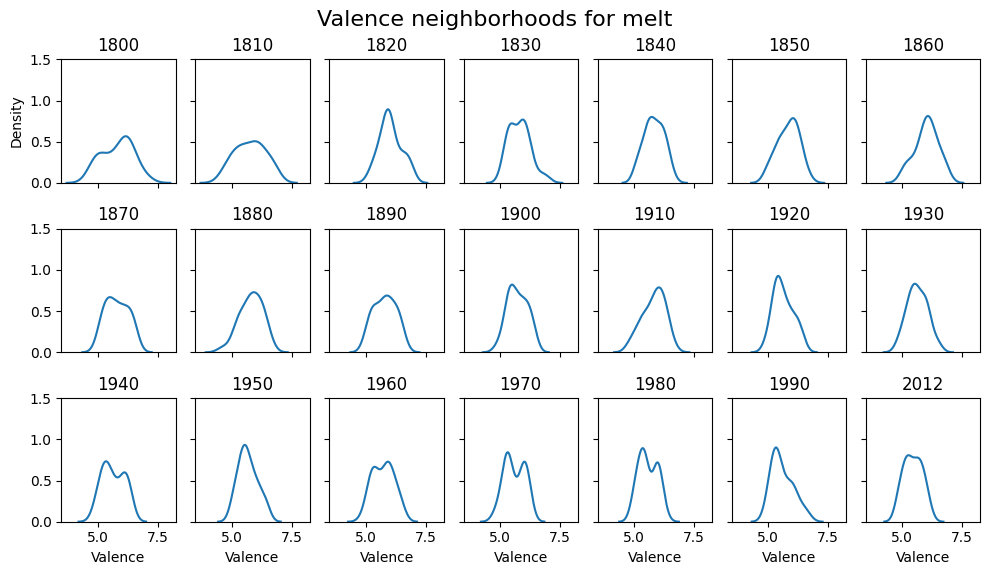

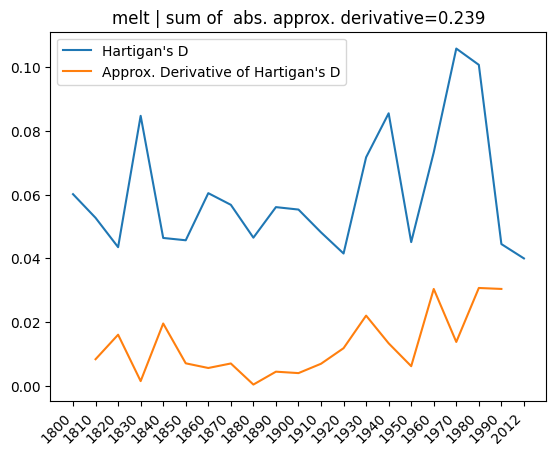

In [4]:
inspected_word = "melt"
rows = 3
cols = 7

fig, axs = plt.subplots(rows, cols,  figsize=(10,6), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.3, wspace=0.3)

hartigans_diptest = []
for idx, inspected_year in enumerate(list(data.keys())):
    
    inspected_word_idx = list(data[inspected_year]['word']).index(inspected_word)
    inspected_word_neighbord_idxs = closestNeighborsIdxs[inspected_year][inspected_word_idx]
    x = data[inspected_year].iloc[list(inspected_word_neighbord_idxs), 1]
    dip, pval = diptest.diptest(x)
    hartigans_diptest.append(dip)

    if (int(idx / cols) == 4):
        axs[int(idx / cols), 1].axis('off')
        axs[int(idx / cols), 2].axis('off')
        axs[int(idx / cols), 3].axis('off')
        axs[int(idx / cols), 4].axis('off')

    sns.kdeplot(ax=axs[int(idx / cols), idx % cols], x=x)
    axs[int(idx / cols), idx % cols].set_xlabel('Valence')
        
    if int(idx / cols) == 0:
        axs[int(idx / cols), idx % cols].set_ylabel('Density')
    else:
        axs[int(idx / cols), idx % cols].set_ylabel("")
    
    axs[int(idx / cols), idx % cols].set_ylim(0, 1.5)
    axs[int(idx / cols), idx % cols].set_title(inspected_year)
    

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.suptitle('Valence neighborhoods for {}'.format(inspected_word), fontsize=16)
plt.show()

plt.xticks(rotation=45, ha='right')
deriv = np.abs(calculate_derivative(hartigans_diptest))
plt.plot(list(data.keys()), hartigans_diptest, label = "Hartigan's D")
plt.plot(list(data.keys())[1:-1], deriv, label = "Approx. Derivative of Hartigan's D")
plt.title("{} | sum of  abs. approx. derivative={}".format(inspected_word, round(sum(deriv), 3)))
plt.legend()